In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
import matplotlib.patches as mpatches
import json
import traceback

In [3]:
base_url = 'https://developers.themoviedb.org/3/discover/movie-discover'
url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key
pop="&primary_release_year=2019&include_adult=False&page="
GenreID="https://api.themoviedb.org/3/genre/movie/list?api_key="
Gen="&language=en-US"
querys = f"{GenreID}{api_key}{Gen}"

In [4]:
response = requests.get(querys).json()
genres=[]
genreword=[]
for k in range(0,19,1):
    try:
        genres.append(response['genres'][k]['id'])
        genreword.append(response['genres'][k]["name"])
    except:
        genres.append(np.nan)
        genreword.append(np.nan)
        
GenreFrame=pd.DataFrame({"Genres": genres,
                         "Genre Names": genreword
                        })  

GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [5]:
Genres = []
Date=[]
MovieTitle=[]
Pop=[]
VoteAvg=[]

for i in range(1,501,1):
    query = f"{url}{pop}{i}"
    response = requests.get(query).json()
    
    for j in range(0,20,1):
        try:
            Pop.append(response['results'][j]["popularity"])
            MovieTitle.append(response['results'][j]["original_title"])
            VoteAvg.append(response['results'][j]["vote_average"])
            Genres.append(response['results'][j]["genre_ids"])
            Date.append(response['results'][j]["release_date"])
            
        except TypeError:
            Pop.append(np.nan)
            MovieTitle.append(np.nan)
            VoteAvg.append(np.nan)
            Genres.append(np.nan)
            Date.append(np.nan)

In [6]:
Movies=pd.DataFrame({'Movie Title':MovieTitle,
                    'Popular Score':Pop,
                    'Vote Average':VoteAvg,
                    'Genres':Genres,
                    'Release Date': Date})

In [7]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,365.312,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,A Rainy Day in New York,197.005,6.7,"[35, 10749]",2019-07-26
2,Jumanji: The Next Level,203.314,6.8,"[28, 12, 35, 14]",2019-12-04
3,1917,177.169,8.0,"[18, 10752]",2019-12-25
4,Frozen II,163.381,7.1,"[12, 16, 10751]",2019-11-20
...,...,...,...,...,...
9995,A mulher que sou,0.600,0.0,[],2019-08-28
9996,A ética das hienas,0.600,0.0,[],2019-08-20
9997,Grand Loup & Petit Loup,0.744,0.0,"[16, 10751]",2019-10-16
9998,Trop Petit Loup,0.744,0.0,"[16, 10751]",2019-10-16


In [8]:
Movies = Movies[Movies.astype(str)['Genres'] != '[]']
# A ton of our Genre values were listed as '[]', which wasn't registering as NaN, NA, null, or 0. Probably the main reason
# later edits became so difficult

In [9]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,365.312,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,A Rainy Day in New York,197.005,6.7,"[35, 10749]",2019-07-26
2,Jumanji: The Next Level,203.314,6.8,"[28, 12, 35, 14]",2019-12-04
3,1917,177.169,8.0,"[18, 10752]",2019-12-25
4,Frozen II,163.381,7.1,"[12, 16, 10751]",2019-11-20
...,...,...,...,...,...
9993,Submerge,0.600,0.0,[16],2019-07-13
9994,Songs Of Summer,0.696,0.0,"[18, 10749]",2019-07-07
9997,Grand Loup & Petit Loup,0.744,0.0,"[16, 10751]",2019-10-16
9998,Trop Petit Loup,0.744,0.0,"[16, 10751]",2019-10-16


In [10]:
Movies.reset_index(inplace=True)

In [11]:
Movies = Movies.drop(columns='index')

In [12]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,365.312,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,A Rainy Day in New York,197.005,6.7,"[35, 10749]",2019-07-26
2,Jumanji: The Next Level,203.314,6.8,"[28, 12, 35, 14]",2019-12-04
3,1917,177.169,8.0,"[18, 10752]",2019-12-25
4,Frozen II,163.381,7.1,"[12, 16, 10751]",2019-11-20
...,...,...,...,...,...
8275,Submerge,0.600,0.0,[16],2019-07-13
8276,Songs Of Summer,0.696,0.0,"[18, 10749]",2019-07-07
8277,Grand Loup & Petit Loup,0.744,0.0,"[16, 10751]",2019-10-16
8278,Trop Petit Loup,0.744,0.0,"[16, 10751]",2019-10-16


In [13]:
Movies['Month']=pd.DatetimeIndex(Movies["Release Date"]).month

Janscore = Movies.loc[Movies["Month"] == 1]
Febscore= Movies.loc[Movies["Month"] == 2]
Marscore= Movies.loc[Movies["Month"] == 3]
Aprscore= Movies.loc[Movies["Month"] == 4]
Mayscore= Movies.loc[Movies["Month"] == 5]
Junscore= Movies.loc[Movies["Month"] == 6]
Julscore= Movies.loc[Movies["Month"] == 7]
Augscore= Movies.loc[Movies["Month"] == 8]
Septscore= Movies.loc[Movies["Month"] == 9]
Octscore= Movies.loc[Movies["Month"] == 10]
Novscore= Movies.loc[Movies["Month"] == 11]
Decscore= Movies.loc[Movies["Month"] == 12]

Jan=Janscore.loc[Janscore['Popular Score'].idxmax()]
Ja=Jan['Genres'][0]
Feb=Febscore.loc[Febscore['Popular Score'].idxmax()]
Fe=Feb['Genres'][0]
Mar=Marscore.loc[Marscore['Popular Score'].idxmax()]
Ma=Mar['Genres'][0]
Apr=Aprscore.loc[Aprscore['Popular Score'].idxmax()]
Ap=Apr['Genres'][0]
May=Mayscore.loc[Mayscore['Popular Score'].idxmax()]
Mayo=May['Genres'][0]
June=Junscore.loc[Junscore['Popular Score'].idxmax()]
Junio=June['Genres'][0]
July=Julscore.loc[Julscore['Popular Score'].idxmax()]
Julio=July['Genres'][0]
Aug=Augscore.loc[Augscore['Popular Score'].idxmax()]
Au=Aug['Genres'][0]
Sept=Septscore.loc[Septscore['Popular Score'].idxmax()]
Se=Sept['Genres'][0]
Oct=Octscore.loc[Octscore['Popular Score'].idxmax()]
Oc=Oct['Genres'][0]
Nov=Novscore.loc[Novscore['Popular Score'].idxmax()]
No=Nov['Genres'][0]
Dec=Decscore.loc[Decscore['Popular Score'].idxmax()]
De=Dec['Genres'][0]
De

28

In [14]:
Months=Movies.groupby(Movies["Month"])
MaxMonthScore=Months["Popular Score"].max()
MaxMonthScore
TopGenreframe=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Genres":[Ja,Fe,Ma,Ap,Mayo,Junio,Julio,Au,Se,Oc,No,De],
                            "MonthID":[1,2,3,4,5,6,7,8,9,10,11,12]
                             
                            
    
                            })
MaxM=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Top Score":[MaxMonthScore[1],MaxMonthScore[2],MaxMonthScore[3],MaxMonthScore[4],MaxMonthScore[5]
                                     ,MaxMonthScore[6],MaxMonthScore[7],MaxMonthScore[8],MaxMonthScore[9],MaxMonthScore[10],
                                     MaxMonthScore[11],MaxMonthScore[12]]  
                             
                            
    
                            })

Basis=pd.merge(TopGenreframe,MaxM,how="inner",on="Month")
Basis

,Month,Genres,MonthID,Top Score
0,Jan,28,1,37.435
1,Feb,18,2,27.206
2,Mar,28,3,36.073
3,Apr,28,4,44.219
4,May,35,5,106.911
5,June,28,6,52.138
6,July,35,7,197.005
7,Aug,18,8,47.704
8,Sep,12,9,365.312
9,Oct,80,10,141.343


In [15]:
New=pd.merge(GenreFrame,Basis,how="inner",on="Genres")

New.sort_values(by='MonthID', inplace=True)
New

,Genres,Genre Names,Month,MonthID,Top Score
0,28,Action,Jan,1,37.435
10,18,Drama,Feb,2,27.206
1,28,Action,Mar,3,36.073
2,28,Action,Apr,4,44.219
7,35,Comedy,May,5,106.911
3,28,Action,June,6,52.138
8,35,Comedy,July,7,197.005
11,18,Drama,Aug,8,47.704
5,12,Adventure,Sep,9,365.312
9,80,Crime,Oct,10,141.343


In [16]:
BestMonth = pd.DataFrame(columns=['Month', 'Genre', 'Top Score', 'Month ID'])
BestMonth

,Month,Genre,Top Score,Month ID


In [17]:
BestMonth['Month'] = New['Month']
BestMonth['Month ID'] = New['MonthID']
BestMonth['Genre'] = New['Genre Names']
BestMonth['Top Score'] = New['Top Score']

BestMonth.set_index('Month ID', inplace=True)

BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Action,37.435
2,Feb,Drama,27.206
3,Mar,Action,36.073
4,Apr,Action,44.219
5,May,Comedy,106.911
6,June,Action,52.138
7,July,Comedy,197.005
8,Aug,Drama,47.704
9,Sep,Adventure,365.312


In [18]:
Parse=Movies["Genres"].apply(pd.Series)

In [19]:
Parse.columns=["Genre1","Genre2","Genre3","Genre4","Genre5","Genre6","Genre7"]

In [20]:
Parse.fillna(0)

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,12.0,18.0,9648.0,878.0,53.0,0.0,0.0
1,35.0,10749.0,0.0,0.0,0.0,0.0,0.0
2,28.0,12.0,35.0,14.0,0.0,0.0,0.0
3,18.0,10752.0,0.0,0.0,0.0,0.0,0.0
4,12.0,16.0,10751.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8275,16.0,0.0,0.0,0.0,0.0,0.0,0.0
8276,18.0,10749.0,0.0,0.0,0.0,0.0,0.0
8277,16.0,10751.0,0.0,0.0,0.0,0.0,0.0
8278,16.0,10751.0,0.0,0.0,0.0,0.0,0.0


In [21]:
count1 = Parse["Genre1"].value_counts()
count2 = Parse["Genre2"].value_counts()
count3 = Parse["Genre3"].value_counts()
count4 = Parse["Genre4"].value_counts()
count5 = Parse["Genre5"].value_counts()
count6 = Parse["Genre6"].value_counts()
count7 = Parse["Genre7"].value_counts()

count1df = pd.DataFrame(data=count1)
count2df = pd.DataFrame(data=count2)
count3df = pd.DataFrame(data=count3)
count4df = pd.DataFrame(data=count4)
count5df = pd.DataFrame(data=count5)
count6df = pd.DataFrame(data=count6)
count7df = pd.DataFrame(data=count7)

count1df.reset_index(inplace=True)
count2df.reset_index(inplace=True)
count3df.reset_index(inplace=True)
count4df.reset_index(inplace=True)
count5df.reset_index(inplace=True)
count6df.reset_index(inplace=True)
count7df.reset_index(inplace=True)

In [22]:
merge1=pd.merge(count1df, count2df, how='left', on='index')
merge2=pd.merge(merge1, count3df, how='left', on='index')
merge3=pd.merge(merge2, count4df, how='left', on='index')
merge4=pd.merge(merge3, count5df, how='left', on='index')
merge5=pd.merge(merge4, count6df, how='left', on='index')
finalmerge=pd.merge(merge5, count7df, how='left', on='index')
finalmerge.set_index('index', inplace=True)

In [23]:
finalmerge['sum'] = finalmerge.sum(axis=1)
finalmerge['sum']

index
18.0       2977.0
99.0       1969.0
35.0       1748.0
27.0        840.0
28.0        626.0
16.0        474.0
53.0        947.0
10749.0     756.0
80.0        455.0
12.0        260.0
10402.0     294.0
878.0       290.0
9648.0      298.0
10751.0     361.0
14.0        264.0
10770.0     417.0
36.0        226.0
37.0         35.0
10752.0     100.0
Name: sum, dtype: float64

In [24]:
ReleaseGenreFrame = GenreFrame.sort_values(by='Genres')
ReleaseGenreFrame = ReleaseGenreFrame.rename(columns={'Genres':'index'})
ReleaseGenreFrame

,index,Genre Names
1,12,Adventure
8,14,Fantasy
2,16,Animation
6,18,Drama
10,27,Horror
0,28,Action
3,35,Comedy
9,36,History
18,37,Western
16,53,Thriller


In [25]:
Releases = pd.DataFrame(data=finalmerge['sum'])
Releases.reset_index(inplace=True)
Releases = Releases.astype({'index': 'int64','sum': 'int64'})

In [26]:
TotalFrame = Releases.sort_values(by='index')
TotalFrame

,index,sum
9,12,260
14,14,264
5,16,474
0,18,2977
3,27,840
4,28,626
2,35,1748
16,36,226
17,37,35
6,53,947


In [27]:
TotalReleases = pd.merge(ReleaseGenreFrame,TotalFrame,how='inner', on='index')

In [28]:
TotalReleases = TotalReleases.sort_values(by='sum', ascending=False)
TotalReleases = TotalReleases.rename(columns={'index':'Genre ID', 'Genre Names': 'Genre', 'sum':'Total Count'})
TotalReleases.set_index('Genre ID', inplace=True)

In [29]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,2977
99,Documentary,1969
35,Comedy,1748
53,Thriller,947
27,Horror,840
10749,Romance,756
28,Action,626
16,Animation,474
80,Crime,455


In [30]:
topmovies = Movies[:100]
topgenres = topmovies['Genres']
topcount = topgenres.value_counts()
topcount

[28, 12, 878]          7
[18]                   6
[28, 53]               4
[18, 10749]            3
[35, 10749]            3
                      ..
[28, 80]               1
[18, 9648, 878, 53]    1
[28, 18]               1
[28, 80, 18, 53]       1
[35, 18, 14]           1
Name: Genres, Length: 71, dtype: int64

In [31]:
topcombos = topcount.nlargest(10)
topcombos = pd.DataFrame(data=topcombos)
topcombos.reset_index(inplace=True)

In [32]:
topcombos = topcombos.rename(columns={'index': 'Genre IDs','Genres':'Count'})
topcombos

,Genre IDs,Count
0,"[28, 12, 878]",7
1,[18],6
2,"[28, 53]",4
3,"[18, 10749]",3
4,"[35, 10749]",3
5,[27],3
6,[35],2
7,"[12, 16, 35, 10751]",2
8,"[18, 9648, 53]",2
9,"[35, 18, 53]",2


In [33]:
topcombos = topcombos[topcombos['Genre IDs'].map(lambda d: len(d)) > 1]
topcombos.reset_index(inplace=True)
topcombos.drop(columns='index', inplace=True)
topslice = topcombos[0:3]
topcombos

C:\Users\Cade\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Genre IDs,Count
0,"[28, 12, 878]",7
1,"[28, 53]",4
2,"[18, 10749]",3
3,"[35, 10749]",3
4,"[12, 16, 35, 10751]",2
5,"[18, 9648, 53]",2
6,"[35, 18, 53]",2


In [34]:
Top3Combo = pd.DataFrame(columns=['Genre IDs', 'Genres', 'Top 100 Count'])

In [35]:
Top3Combo['Genre IDs'] = topslice['Genre IDs']
Top3Combo['Top 100 Count'] = topslice['Count']
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]",NaN,7
1,"[28, 53]",NaN,4
2,"[18, 10749]",NaN,3


In [36]:
print(GenreFrame.loc[GenreFrame['Genres'] == 28])
print(GenreFrame.loc[GenreFrame['Genres'] == 12])
print(GenreFrame.loc[GenreFrame['Genres'] == 878])
print(GenreFrame.loc[GenreFrame['Genres'] == 53])
print(GenreFrame.loc[GenreFrame['Genres'] == 35])
print(GenreFrame.loc[GenreFrame['Genres'] == 10749])

   Genres Genre Names
0      28      Action
   Genres Genre Names
1      12   Adventure
    Genres      Genre Names
14     878  Science Fiction
    Genres Genre Names
16      53    Thriller
   Genres Genre Names
3      35      Comedy
    Genres Genre Names
13   10749     Romance


In [37]:
Top3Combo['Genres'] = ['Action, Adventure, Science Fiction','Action, Thriller','Comedy, Romance']
# Hardcoded the values based on the IDs because the values are going to be unchanging and I was honestly super tired 
# of figuring out how to loop through the IDs in this set
# However, we can swap it to a loop if you guys would like to
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]","Action, Adventure, Science Fiction",7
1,"[28, 53]","Action, Thriller",4
2,"[18, 10749]","Comedy, Romance",3


In [38]:
# Final 3 conclusive dataframes (based on the first 3 questions)
# --------------------------------------------------------------
BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Action,37.435
2,Feb,Drama,27.206
3,Mar,Action,36.073
4,Apr,Action,44.219
5,May,Comedy,106.911
6,June,Action,52.138
7,July,Comedy,197.005
8,Aug,Drama,47.704
9,Sep,Adventure,365.312


In [39]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,2977
99,Documentary,1969
35,Comedy,1748
53,Thriller,947
27,Horror,840
10749,Romance,756
28,Action,626
16,Animation,474
80,Crime,455


In [40]:
Top3Combo

,Genre IDs,Genres,Top 100 Count
0,"[28, 12, 878]","Action, Adventure, Science Fiction",7
1,"[28, 53]","Action, Thriller",4
2,"[18, 10749]","Comedy, Romance",3


In [ ]:
# We can extrapolate whatever other data we need fairly easily now I think
# If we imitate what we've done so far, we should be able to query for pretty much anything within our original dataframe

Text(0.5, 1.0, 'Top Popularity Score per Month')

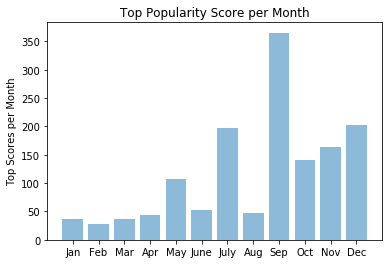

In [41]:
plt.bar(BestMonth["Month"],BestMonth["Top Score"], align='center', alpha=0.5)
plt.legend
plt.ylabel('Top Scores per Month')
plt.title('Top Popularity Score per Month')


# GenandMon=

Text(0.5, 1.0, 'Top Popularity Genre per Month')

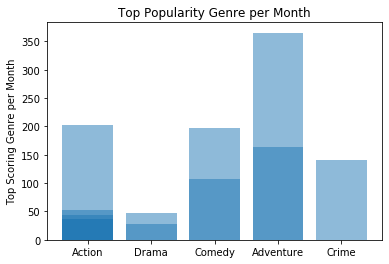

In [42]:
plt.bar(BestMonth["Genre"],BestMonth["Top Score"], align='center', alpha=0.5)

plt.ylabel('Top Scoring Genre per Month')
plt.title('Top Popularity Genre per Month')

In [ ]:
# I'm pretty burnt out for tonight after figuring the loops out so I'll tackle the graph stuff with you guys later